In [1]:
import graph_tool.all as gt
from packing_coloring.graph_generator import *
from packing_coloring.utils import *
from packing_coloring.algorithms.problem import *

from packing_coloring.algorithms.constructive.rlf_algo import *
from packing_coloring.algorithms.constructive.swo_algo import *
from packing_coloring.algorithms.perturbative.hybrid_algo import *
from packing_coloring.algorithms.perturbative.tabupackcol import *

import numpy as np
import pandas as pd
import igraph
np.set_printoptions(threshold=np.nan)

from IPython.html.widgets import interactive
from IPython.display import display
from os import listdir
from os.path import join, isfile
from pylab import get_cmap

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def square_grid_ha_pcoloring(size, file_name="test.pdf", out_size=(250,250), font_size=22):
    g = gt.lattice([size, size])
    dist_mat = get_distance_matrix(g)
    prob = GraphProblem(dist_mat)
    
    eval_func = lambda prob, a: a.get_area_score(prob)
    ls_args = {"k_count":3, "tt_a":20, "tt_d":0.6, "max_iter":1000}
    init_args = {"iter_count":100, "blame_value":25, "blame_rate":0.85}
    p_col1 = hybrid_algorithm(prob, 10, 10, 2, partial_pack_col, ls_args, swo_algorithm, init_args, eval_func)

    pos = gt.sfdp_layout(g, max_iter=1)
    for i,v in enumerate(g.vertices()):
        pos[v][0] = np.floor(i/size)*2
        pos[v][1] = (i%size)*2

    max_col = p_col1.get_max_col()
    col = [c/max_col for c in p_col1]
    col_v = g.new_vertex_property("float")
    col_v.a = np.array(col)

    text_v = g.new_vertex_property("int")
    text_v.a = p_col1.pack_col.astype(int)

    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, output_size=out_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), output=file_name)
    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), inline=True)

    print(np.max(p_col1))
    print(p_col1)
    
def random_ha_pcoloring(file_name="test.pdf", out_size=(250,250), font_size=16):
    g = gt.load_graph("instances/dot_format/random.dot")
    dist_mat = get_distance_matrix(g)
    prob = GraphProblem(dist_mat)

    eval_func = lambda prob, a: a.get_area_score(prob)
    ls_args = {"k_count":3, "tt_a":20, "tt_d":0.6, "max_iter":1000}
    init_args = {"iter_count":500, "blame_value":25, "blame_rate":0.85}
    p_col1 = hybrid_algorithm(prob, 10, 10, 2, partial_pack_col, ls_args, swo_algorithm, init_args, eval_func)
    
    pos = gt.sfdp_layout(g, cooling_step=0.95, epsilon=1e-2)
    max_col = p_col1.get_max_col()
    col = [c/max_col for c in p_col1]
    col_v = g.new_vertex_property("float")
    col_v.a = np.array(col)

    text_v = g.new_vertex_property("int")
    text_v.a = p_col1.pack_col.astype(int)

    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, output_size=out_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), output=file_name)
    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), inline=True)

    print(np.max(p_col1))
    print(p_col1)

def dist_ha_pcoloring(file_name="test.pdf", out_size=(250,250), font_size=16):
    g = generator.distance_graph((2, 5), 336)
    dist_mat = get_distance_matrix(g)
    prob = GraphProblem(dist_mat)

    eval_func = lambda prob, a: a.get_area_score(prob)
    ls_args = {"k_count":5, "tt_a":50, "tt_d":0.6, "max_iter":1000}
    init_args = {"iter_count":100, "blame_value":25, "blame_rate":0.85}
    p_col1 = hybrid_algorithm(prob, 10, 10, 2, partial_pack_col, ls_args, swo_algorithm, init_args, eval_func)
    
    pos = gt.sfdp_layout(g, cooling_step=0.95, epsilon=1e-2)
    max_col = p_col1.get_max_col()
    col = [c/max_col for c in p_col1]
    col_v = g.new_vertex_property("float")
    col_v.a = np.array(col)

    text_v = g.new_vertex_property("int")
    text_v.a = p_col1.pack_col.astype(int)

    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, output_size=out_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), output=file_name)
    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), inline=True)

    print(np.max(p_col1))
    print(p_col1)

# Packing coloration of 3x3 grid using TS

init candidate # 0 : 4
init candidate # 1 : 5
init candidate # 2 : 5
init candidate # 3 : 5
init candidate # 4 : 5
init candidate # 5 : 5
init candidate # 6 : 5
init candidate # 7 : 4
init candidate # 8 : 5
init candidate # 9 : 5
3
tabue tenure too high
4
3
tabue tenure too high
4
3
tabue tenure too high
individu # 0 's quality: 4
4
3
tabue tenure too high
4
3
tabue tenure too high
4
3
tabue tenure too high
individu # 1 's quality: 4
4
3
tabue tenure too high
4
3
tabue tenure too high
4
3
tabue tenure too high
individu # 2 's quality: 4
4
3
tabue tenure too high
4
3
tabue tenure too high
4
3
tabue tenure too high
individu # 3 's quality: 4
4
3
tabue tenure too high
4
3
tabue tenure too high
4
3
tabue tenure too high
individu # 4 's quality: 4
4
3
tabue tenure too high
4
3
tabue tenure too high
4
3
tabue tenure too high
individu # 5 's quality: 4
4
3
tabue tenure too high
4
3
tabue tenure too high
4
3
tabue tenure too high
individu # 6 's quality: 4
3
tabue tenure too high
4
3
tabue ten

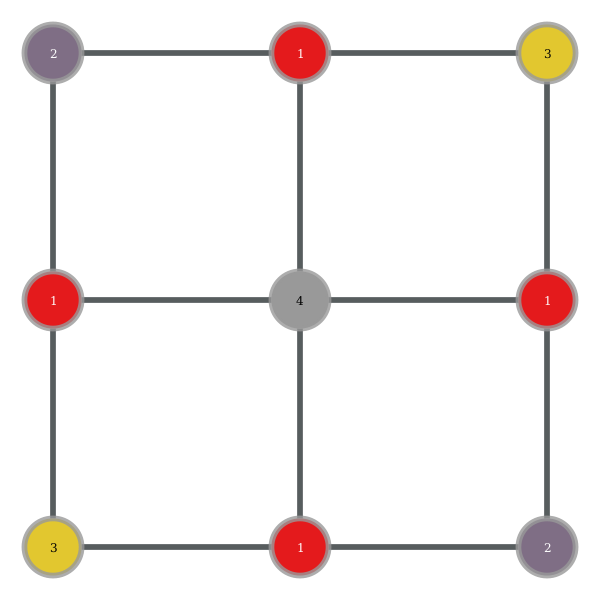

4
[2 1 3 1 4 1 3 1 2]


In [3]:
square_grid_ha_pcoloring(3, file_name="../Report/Pictures/HA_G3-3.pdf", out_size=(105, 150), font_size=12)

# Packing coloration of 24x24 grid using MA

In [ ]:
square_grid_ha_pcoloring(24, file_name="../Report/Pictures/HA_G24-24.pdf", out_size=(500, 500), font_size=15)

init candidate # 0 : 22
init candidate # 1 : 27
init candidate # 2 : 27
init candidate # 3 : 113
init candidate # 4 : 27
init candidate # 5 : 27
init candidate # 6 : 60
init candidate # 7 : 53
init candidate # 8 : 58
init candidate # 9 : 74
21
22
21
22
21
individu #

init candidate # 0 : 13
init candidate # 1 : 15
init candidate # 2 : 16
init candidate # 3 : 15
init candidate # 4 : 16
init candidate # 5 : 15
init candidate # 6 : 17
init candidate # 7 : 17
init candidate # 8 : 17
init candidate # 9 : 17
individu # 0 's quality: 12
individu # 1 's quality: 14
individu # 2 's quality: 12
individu # 3 's quality: 13
individu # 4 's quality: 13
individu # 5 's quality: 12
individu # 6 's quality: 11
individu # 7 's quality: 11
individu # 8 's quality: 12
individu # 9 's quality: 12
[[ 11.           0.30472846]
 [ 11.           0.31330131]
 [ 12.           0.30741847]
 [ 12.           0.30874118]
 [ 12.           0.3263502 ]
 [ 12.           0.33939445]
 [ 12.           0.34874859]
 [ 13.           0.28683015]
 [ 13.           0.3277055 ]
 [ 14.           0.29906143]]
generation # 0
child: 12 0
improved child:  12
mutated child:  13
improved mutated child:  12
[[ 11.           0.30472846]
 [ 11.           0.31330131]
 [ 12.           0.30741847]
 [ 12.  

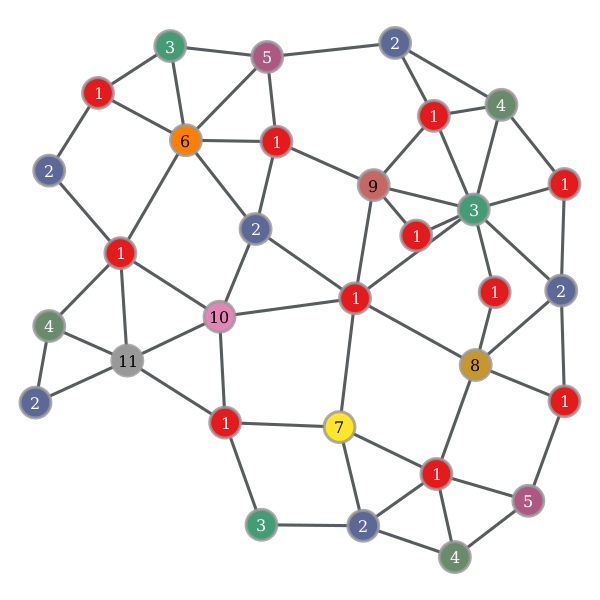

11
[ 4  3  1  8  1  9  1  7  2  5  1  1  2 10  1  3  3  6  1 11  1  2  2  4  2
  1  5  4  2  1  1]


In [3]:
random_ha_pcoloring(file_name="../Report/Pictures/HA_Random.pdf", out_size=(250,250), font_size=16)

init candidate # 0 : 23
init candidate # 1 : 27
init candidate # 2 : 25
init candidate # 3 : 27
init candidate # 4 : 30
init candidate # 5 : 32
init candidate # 6 : 33
init candidate # 7 : 34
init candidate # 8 : 26
init candidate # 9 : 29
individu # 0 's quality: 21
individu # 1 's quality: 21
individu # 2 's quality: 21
individu # 3 's quality: 20
individu # 4 's quality: 20
individu # 5 's quality: 22
individu # 6 's quality: 21
individu # 7 's quality: 22
individu # 8 's quality: 20
individu # 9 's quality: 22
[[ 20.           0.26611608]
 [ 20.           0.26655915]
 [ 20.           0.26743144]
 [ 21.           0.27616323]
 [ 21.           0.27773014]
 [ 21.           0.27847757]
 [ 21.           0.27937361]
 [ 22.           0.28694739]
 [ 22.           0.28876921]
 [ 22.           0.2899961 ]]
generation # 0
child: 21 0
improved child:  21
mutated child:  25
improved mutated child:  21
[[ 20.           0.26611608]
 [ 20.           0.26655915]
 [ 20.           0.26743144]
 [ 21.  

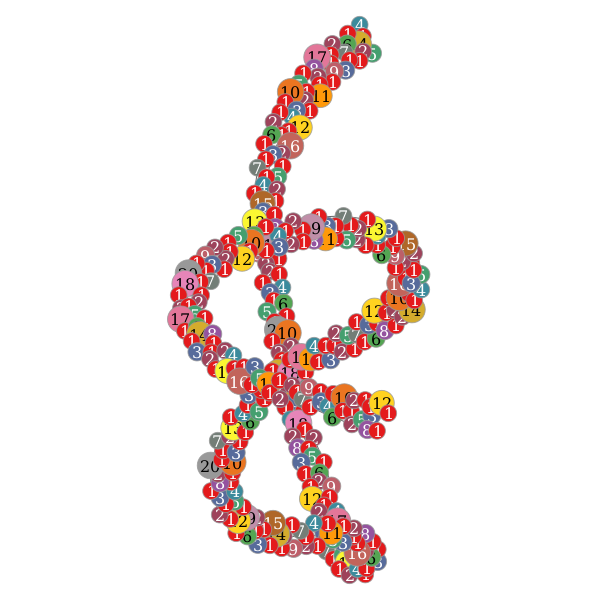

20
[ 4  5  1 14  2  1  1  6  7  1  2  3  1  1  9 17  1  8  2  1  1 11  5  1  2
 10  1  1  3  4  1 12  2  1  1  6 16  1  2  3  1  1  7  5  1  4  2  1  1 15
  3  1 13  8  1  1 19  9  1  2  2  1  1  4  3  1  6  5  1  1 20 10  1  2  2
  1  1 14  7  1 11  3  1  1  4 18  1  2  2  8  1  5  3  1  1  6  2  1  9 12
  1  1  2  4  1 17  3  1  1  7  2  1  5 13  1  1  2 10  1  4  3  1  1  6  2
  1 16  8  1  1  2  3  1  5 11  1  1  4  2  1  7  9  1  1  2 14  1 15  3  1
  1  6  2  1 19 12  1  1  2  5  1  3  4  1  1  8  2  1 20 10  1  1  3  7  1
  2 13  1  1  6  4  1  5  3  1  1  2  2  1  9 18  1  1 17 11  1  4  3  1  1
  2  2  1  5  7  1  1  6  3  1  8 12  1  1  2  2  1 14 10  1  1 16  4  1  5
  3  1  1  2  2  1 15  9  1  1  6  3  1  4 13  1  1  2  2  1  5  7  1  1  3
 11  1  8 19  1  1  2  2  1  4  3  1  1  6 10  1  5 12  1  1  2  2  1  9  3
  1  1  7 20  1  4 18  1  1  2  2  1  5 17  1  1  6 14  1  8  3  1  1  2  2
  1  4 13  1  1 16  3  1  5 11  1  1  2  2  1  7  9  1  1  3  4  1  6 10  1
  1  2  2

In [3]:
dist_ha_pcoloring(file_name="../Report/Pictures/HA_Dist.pdf", out_size=(250,250), font_size=16)